# 10.正则表达式匹配

这题想了好久都没做完整，总有几个是匹配不上的，想来应该是条件判断的时候有漏洞，没有仔细考虑。

## 10.1题目描述

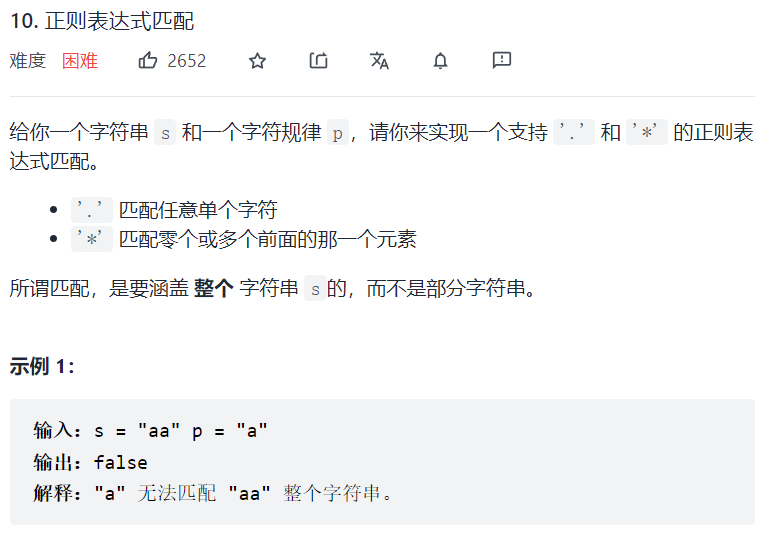

## 10.2我的代码（未完成

In [130]:
class Solution:
    def isMatch(self, s: str, p: str) -> bool:
        s_list = list(s)
        p_list = list(p)
        temp = True
        i = 1
        j = 1
        if '*' not in p_list and len(p_list)!= len(s_list):
            temp = False
        else:
            while (temp == True) and (i<len(s_list) and (j<len(p_list))):
                if s_list[i-1] == p_list[j-1] and p_list[j] == '*' and s_list[i-1] == s_list[i]:
                    i = i+1
                    j = j+1
                    continue
                if p_list[j-1] == '.':
                    i = i+1
                    j = j+1
                    continue
                if s_list[i-1] != p_list[j-1] and p_list[j-1] not in ['.', '*']:
                    if p_list[j] != '*':
                        temp = False
                    elif p_list[j] == '*' :
                        if j+1<len(p_list)-1 and s_list[i] == p_list[j+1]:
                            i = i+1
                            j = j+1
                            continue
                        else:
                            temp = False
                    else:
                        temp = False
                i = i+1
                j = j+1
        return temp

In [131]:
sol = Solution()
print(sol.isMatch('aa', 'a'))
print(sol.isMatch('aa', 'a*'))
print(sol.isMatch('ab', '.*'))
print(sol.isMatch('aab', 'c*a*b'))
print(sol.isMatch('mississippi', 'mis*is*ip*.'))
print(sol.isMatch('abcd', 'd*'))
print(sol.isMatch('ab', '.c*'))
print(sol.isMatch('ab', '.*c')) # 判断出错

False
True
True
True
True
False
False
True


## 10.3官方代码

In [132]:
class Solution:
    def isMatch(self, s: str, p: str) -> bool:
        m, n = len(s), len(p)

        def matches(i: int, j: int) -> bool:
            if i == 0:
                return False
            if p[j - 1] == '.':
                return True
            return s[i - 1] == p[j - 1]

        f = [[False] * (n + 1) for _ in range(m + 1)]
        f[0][0] = True
        for i in range(m + 1):
            for j in range(1, n + 1):
                if p[j - 1] == '*':
                    f[i][j] |= f[i][j - 2]
                    if matches(i, j - 1):
                        f[i][j] |= f[i - 1][j]
                else:
                    if matches(i, j):
                        f[i][j] |= f[i - 1][j - 1]
        return f[m][n]

# 作者：LeetCode-Solution
# 链接：https://leetcode-cn.com/problems/regular-expression-matching/solution/zheng-ze-biao-da-shi-pi-pei-by-leetcode-solution/
# 来源：力扣（LeetCode）
# 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

## 10.4回顾

1.借此机会正好学习一下动态规划中的状态转移，弥补一下这方面的不足，我发现但凡带点动态规划的问题，总容易出现条件判断有漏洞的情况。

2.也算是做到第十题了，顺便回顾一下之前做的题目，看看有没有再改进的地方。